**Проект: использование средств Python для расчёта и визуализации статистических свойств выборки**

Выборка — задача многоклассовой классификации [ирисов Фишера](https://wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
dataset = iris['data']

In [ ]:
target = iris['target']

**1**. Посчитать основные характеристики выборки по каждому признаку:
- среднее;
- дисперсия;
- минимум;
- максимум;
- размах.

In [ ]:
import numpy as np

In [ ]:
features = iris['feature_names']

In [ ]:
for i in range(len(features)):
    print('Признак - ', features[i])
    print('Минимум = ', np.min(dataset[:, i]))
    print('Максимум = ', np.max(dataset[:, i]))
    print('Среднее = ', np.mean(dataset[:, i]))
    print('Дисперсия = ', np.var(dataset[:, i]))
    print('Размах = ', np.ptp(dataset[:, i]))
    print('='*20)

Признак -  sepal length (cm)
Минимум =  4.3
Максимум =  7.9
Среднее =  5.843333333333334
Дисперсия =  0.6811222222222223
Размах =  3.6000000000000005
Признак -  sepal width (cm)
Минимум =  2.0
Максимум =  4.4
Среднее =  3.0573333333333337
Дисперсия =  0.1887128888888889
Размах =  2.4000000000000004
Признак -  petal length (cm)
Минимум =  1.0
Максимум =  6.9
Среднее =  3.7580000000000005
Дисперсия =  3.0955026666666665
Размах =  5.9
Признак -  petal width (cm)
Минимум =  0.1
Максимум =  2.5
Среднее =  1.1993333333333336
Дисперсия =  0.5771328888888888
Размах =  2.4


**2**. Визуализировать распределения признаков посредством seaborn.

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

C:\Users\Maxim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Maxim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Maxim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Maxim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


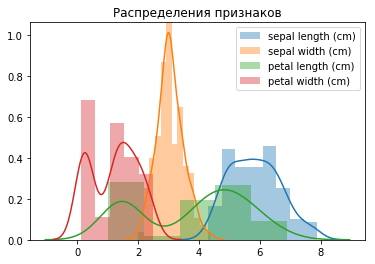

In [ ]:
plt.title('Распределения признаков')
for i in range(len(features)):
    sns.distplot(dataset[:, i])
plt.legend(features)

**3**. Посчитать и визуализировать корреляционную матрицу.

In [ ]:
import pandas as pd

In [ ]:
dataset_df = pd.DataFrame(dataset, columns=features)

In [ ]:
dataset_df.corr().style.background_gradient(cmap='coolwarm')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


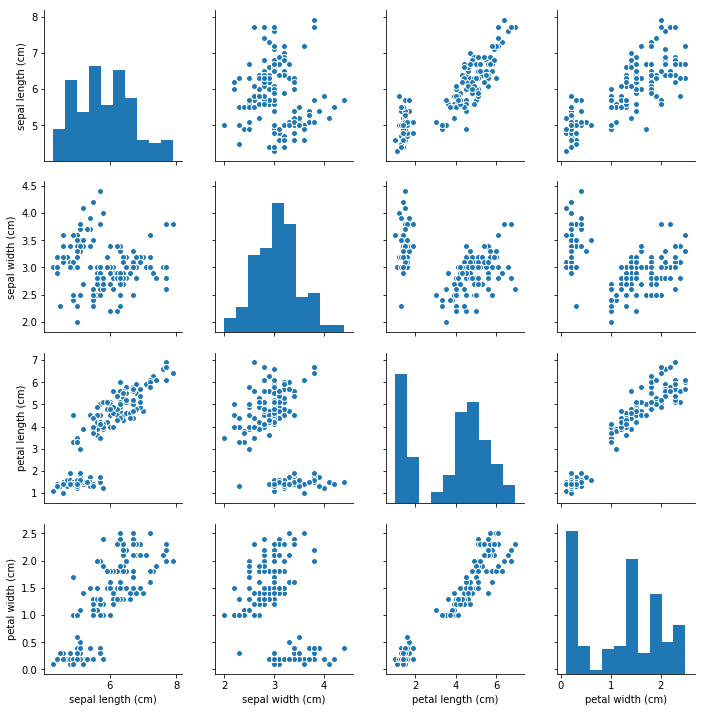

In [ ]:
sns.pairplot(dataset_df)

**4**. Проверить гипотезу о нормальности распределения для признаков 1 и 2.

In [ ]:
from scipy import stats

In [ ]:
stats.normaltest(dataset[:, 1])

NormaltestResult(statistic=3.1238322481520377, pvalue=0.2097338099298262)

##### Для признака 2 нулевая гипотеза о нормальности распределения отклонена, так как p-value меньше критического уровня значимости в 0.05.

In [ ]:
stats.normaltest(dataset[:, 2])

NormaltestResult(statistic=221.68729405585384, pvalue=7.264667501338673e-49)

**5**. Произвести расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [ ]:
dataset_df['TARGET'] = target

##### Интересно, что 0 класс мы можем определить благодаря признаку petal length (cm), так как интервал его значений для этого класса не перекрывается с интервалами других классов.

In [ ]:
dataset_df.groupby('TARGET').agg([np.min, np.max, np.mean, np.var, np.ptp])

sepal length (cm)                            sepal width (cm)       \
                    amin amax   mean       var  ptp             amin amax   
TARGET                                                                      
0                    4.3  5.8  5.006  0.124249  1.5              2.3  4.4   
1                    4.9  7.0  5.936  0.266433  2.1              2.0  3.4   
2                    4.9  7.9  6.588  0.404343  3.0              2.2  3.8   

                             petal length (cm)                             \
         mean       var  ptp              amin amax   mean       var  ptp   
TARGET                                                                      
0       3.428  0.143690  2.1               1.0  1.9  1.462  0.030159  0.9   
1       2.770  0.098469  1.4               3.0  5.1  4.260  0.220816  2.1   
2       2.974  0.104004  1.6               4.5  6.9  5.552  0.304588  2.4   

       petal width (cm)                             
                   amin amax   mean       var  ptp  
TARGET                                              
0                   0.1  0.6  0.246  0.011106  0.5  
1                   1.0  1.8  1.326  0.039106  0.8  
2                   1.4  2.5  2.026  0.075433  1.1

**6**. Написать функцию, автоматизирующую EDA.

In [ ]:
def EDA(dataset_df):
    print('Характеристики по признакам по всей выборки')
    print(dataset_df.describe())
    print('='*20)
    print('Групповые характеристики')
    print(dataset_df.groupby('TARGET').agg([np.min, np.max, np.mean, np.var, np.ptp]))
    print('='*20)
    plt.title('Распределения признаков')
    for i in range(len(features)):
        sns.distplot(dataset[:, i])
    plt.legend(features)
    print('='*20)
    print(dataset_df.corr().style.background_gradient(cmap='coolwarm'))
    print('='*20)
    print(sns.pairplot(dataset_df))

Характеристики по признакам по всей выборки
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      TARGET  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Групповые характеристики
   

C:\Users\Maxim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Maxim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Maxim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Maxim\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


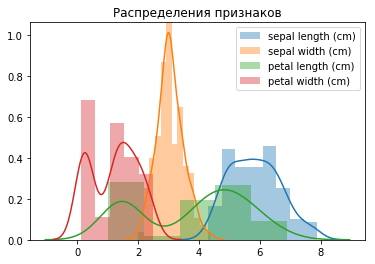

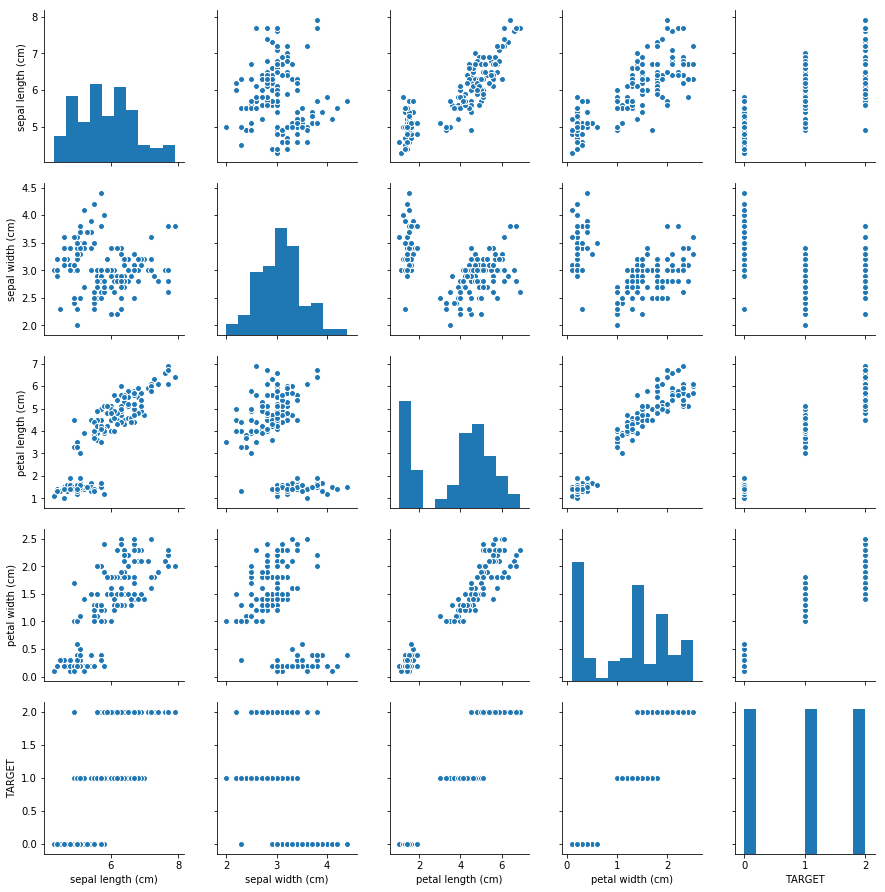

In [ ]:
EDA(dataset_df)

**7**. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

1. Признак petal length (cm) имеет наибольший разброс среди остальных признаков. Потенциально полезен для разделения классов.


2. Признак sepal width (cm) имеет наименьший разброс — по графику видно, что его распределение компактно сконцентрировано около среднего значения. Скорее всего, для разделимости классов он будет играть наименьшую роль.


3. Признаки имеют одинаковый масштаб.


4. Признаки petal length (cm) и petal width (cm) имеют корреляцию, близкую к 1. Это означает, что один из них может быть рассмотрен для исключения без потери информации.


5. Выводы из п. 4 также подтверждаются линейным характером связи для этих признаков на попарных графиках.


6. Выводы проверки распределения двух признаков на нормальность сходятся с графиками распределения. Для признака 2 нулевая гипотеза о нормальности распределения отклонена, так как p-value меньше критического уровня значимости в 0.05.


7. Из-за расчёта статистических показателей раздельно по классам стало заметно, что 0 класс может быть однозначно определён благодаря признаку petal length (cm), так как интервал его значений для этого класса не перекрывается с интервалами других классов.